# Problema 8.18

A continuación se muestran la razón de amplitud y desfase en función de la frecuencia de tres sistemas desconocidos:

- Sistema 1:

$\omega$<br>(ciclos/min)| RA | $\phi$ (°)
:---:|------|-------
0.01 | 10   | -0.63
0.05 | 9.99 | -3.15
0.10 | 9.99 | -6.30
1.0 | 9.95 | -63.01
3.0 | 9.58 | -188.60
5.0 | 8.94 | -313.04
7.0 | 8.19 | -436.06
9.0 | 7.43 |-557.65
10.0 | 7.04 | -617.96
12.0 | 6.40 | -737.74
15.0 | 5.55 | -915.75
20.0 | 4.47 | -1209.35
30.0 | 3.16 | etc.
40.0 | 2.43 | 
50.0  | 1.96 |

- Sistema 2:

$\omega$<br>(ciclos/min)| RA | $\phi$ (°)
:---:|------|-------
0.01 | 5.00 | -0.23
0.05 | 5.05 | -1.13
0.10 | 5.20 | -2.39
0.20 | 5.93 | -5.44
0.30 | 7.68 | -11.62
0.40 | 12.69 | -23.96
0.50 | 25.00 | -90.00
0.60 | 9.98 | -151.39
0.70 | 5.00 | -163.74
0.80 | 3.25 | -168.10
0.90 | 2.20 | -170.87
1.10 | 1.29 | -173.46
1.50 | 0.62 | -175.71
2.00 | 0.33 | -176.95
5.00 | 0.05 | -178.84

- Sistema 3:

$\omega$<br>(ciclos/min)| RA | $\phi$ (°)
:---:|------|-------
0.01 | 17 | -1.49
0.02 | 16.99 | -2.98
0.10 | 16.67 | -14.75
0.30 | 14.42 | -41.21
0.50 | 11.66 | -61.90
0.70 | 9.33 | -77.76
1.00 | 6.80 | -95.73
1.50 | 4.30 | -117.03
2.00 | 2.92 | -132.42
2.50 | 2.07 | -144.53
3.00 | 1.55 | -154.04
4.00 | 0.94 | -169.23
8.00 | 0.26 | -208.22
10.00 | 0.17 | -223.12
20.00 | 0.04 | -287.45

1. Determinar el orden de los sistemas y buscar la existencia de tiempos muertos.

2. Calcular los valores de los parámetros de los sistemas, incluido el retraso, si existe.

---

**Solución**

_Sistema 1_

El primer paso será realizar una representación gráfica de los datos:

In [2]:
w_1 = [0.01, 0.05, 0.10, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0, 15.0, 20.0]

RA_1 = [10, 9.99, 9.99, 9.95, 9.58, 8.94, 8.19, 7.43, 7.04, 6.40, 5.55, 4.47]

phi_1 = [-0.63, -3.15, -6.30, -63.01, -188.60, -313.04, -436.06, -557.65, -617.96, -737.74, -915.75, -1209.35];

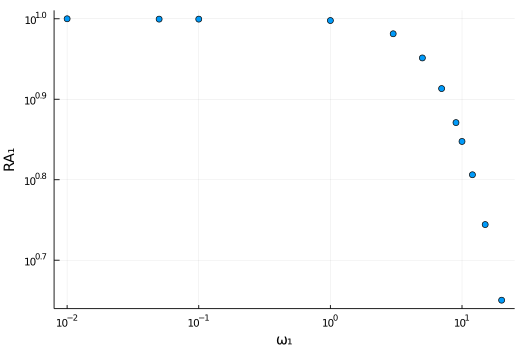

In [8]:
using Plots

scatter(w_1, RA_1, xscale=:log10, yscale=:log10,
    xlabel="ω₁", ylabel="RA₁", legend=false, dpi=350)

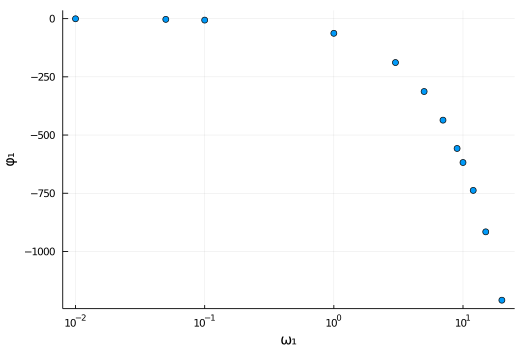

In [7]:
scatter(w_1, phi_1, xscale=:log10,
    xlabel="ω₁", ylabel="φ₁", legend=false, dpi=350)

Observando la tabla de razón de amplitudes y desfase de la tabla para el Sistema 1 y su representación gráfica se obtienen las dos conclusiones siguientes:

1.  Se trata de un sistema de primer orden o de segundo orden sobreamortiguado, ya que la razón de amplitudes decrece a medida que aumenta la frecuancia angular.

2.  El desfase disminuye de manera no asintótica al aumentar la frecuencia angular.

Los parámetros del sistema se pueden obtener de diversas manera:

*Resolución gráfica*

Se puede suponer que se trata de un sistema de primer orden con retraso, lo que implica:

$$\begin{aligned}
  \text{Razón de Amplitudes: } & RA = \frac{K}{\sqrt{1 + \tau^2
  \omega^2}} \\
  \text{Desfase: } & \varphi = \frac{180}{\pi}  [\mathrm{atan} (-\tau \omega) - t_d \omega]
\end{aligned}$$
  
Se puede determinar la ganancia del proceso utilizando la asíntota de baja frecuencia, es
decir, sabiendo que:

$$\mathrm{ABF} = \lim_{\omega \to 0} = \frac{K}{\sqrt{1 + \tau^2 \omega^2}} = K$$

La ganancia del sistema coincidirá con el valor de la razón de amplitudes a baja frecuencia. Por tanto:

$$K = 10$$
   
Utilizando la asíntota de alta frecuencia se puede encontrar la constante de tiempo del sistema:

$$\mathrm{AAF} = \log RA \approx \log K - \log \tau \omega = \log K -
   \log \tau - \log \omega$$
   
La asíntota de alta frecuencia es una recta de pendiente -1 y cuya ordenada en el origen es $\log K - \log \tau$. Gráficamente se puede encontrar la AAF al representar $\log RA$ frente a $\log \omega$. Se obtiene la siguiente recta:

$$\log RA = - \log \omega - 1.991$$

Por tanto, sabiendo que $K = 10$, se obtiene la siguiente constante de tiempo del sistema:

$$\tau = 0.10$$
   
Para encontrar el valor del retraso será necesario recurrir a los datos del desfase. Despejando de la ec. (2) se obtiene:

$$\varphi \frac{\pi}{180} + \mathrm{atan} (- \omega \tau) = - t_d \omega$$

Tomando los 8 últimos puntos para los que se dispone de información
sobre el desfase se obtiene el siguiente retraso (pendiente de la recta
que ajusta los puntos según la ecuación anterior):

$$t_d = -1.0$$

Podemos comprobar la suposición de que el sistema es de primer orden con retraso representando la razón de amplitudes y el desfase del modelo junto con los datos experimentales. Para ello utilizaremos la función siguiente, que utilizaremos con el resto de sistemas del problema:

In [9]:
using SymPy
@vars s w
G1 = 10/(0.1s+1)*exp(-1.0s)

    -1.0⋅s
10⋅ℯ      
──────────
0.1⋅s + 1 

In [15]:
using DSP
function drawbode(G, wdata, RAdata, phidata)
    Gw = G(s=>im*w)
    
    # Cálculo de la razón de amplitudes de la función de transferencia de
    # lazo abierto G
    RA = sqrt(real(Gw)^2+im(Gw)^2)
    
    # Se calculan 100 puntos entre los extremos de las frecuencia angulares
    # para los que hay datos experimentales
    wlog = range(log10(wdata[1]), log10(wdata[end]); length=100)
    wsim = 10 .^wlog
    
    # Representación de los puntos experimentales
    RAplot = scatter(wdata, RAdata, xscale=:log10, yscale=:log10,
        ylabel="RA", legend=false)
    
    # Representación de la curva ajustada
    plot!(wsim, RA)
    
    # Representación del desfase
    phi = atan(im(Gw)/real(Gw))
    phisim = lambdify(phi).(wsim)
    DSP.unwrap!(phisim, range=pi)
    phiplot = scatter(wdata, phidata, xscale=:log10, xlabel="ω", ylabel="φ", legend=false)
    plot!(wsim, phisim.*180/pi)
    
    plot(RAplot, phiplot, layout=grid(2,1), show=true, dpi=350)
end

drawbode (generic function with 1 method)

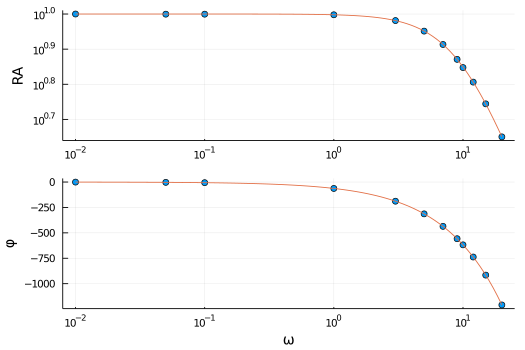

In [16]:
drawbode(G1, w_1, RA_1, phi_1)

_Resolución mediante regresión no lineal_

Cargamos la biblioteca, creamos el modelo y realizamos el ajuste para la razón de amplitudes, lo que nos permitirá encontrar la ganancia y la constante de tiempo del proceso en cuestión:

In [17]:
using LsqFit

@. RAmodel_1(w, p) = p[1]/sqrt(1+p[2]^2*w^2)

fitRA1 = curve_fit(RAmodel_1, w_1, RA_1, [1.0,1.0]; autodiff=:forwarddiff)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([9.995973725031158, 0.10009388111275176], [-0.004031282340678288, 0.005848542992753281, 0.005473025093987616, -0.0037268863964108334, -0.006336056416909486, -0.0010083349439646838, -0.003507513194605849, -0.003172293161826545, 0.024903722436548925, -0.004277808779430181, -0.00883339307982478, -0.003019885143573653], [0.9999994990611245 -0.00010005343020183683; 0.9999874767539563 -0.002501245540604989; … ; 0.5543398531595183 -38.34806550782738; 0.4468779368307616 -35.71571644181666], true, Float64[])

In [18]:
K_1 = fitRA1.param[1]
round(K_1, sigdigits=3)

10.0

In [19]:
T_1 = fitRA1.param[2]
round(T_1, sigdigits=3)

0.1

In [20]:
@. phimodel_1(w, p) = 180/pi*(atan(-T_1*w)-p[1]*w)

fitphi1 = curve_fit(phimodel_1, w_1, phi_1, [1.0]; autodiff=:forwarddiff)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.9999673701743539], [-0.00028864989389243423, -0.0014409512133504165, -0.002867539180766876, 0.00017121603750780423, 0.004222464622984035, -0.016112912019309533, -0.014652559968226342, -0.009137284454823202, -0.0059819548567929814, -0.007787855215156014, 0.006608111105038006, 0.015352123624552405], [-0.5729577951308232; -2.8647889756541165; … ; -859.4366926962348; -1145.9155902616465], true, Float64[])

In [21]:
td_1 = fitphi1.param[1]
round(td_1, sigdigits=3)

1.0

_Sistema 2_

De nuevo, empezamos representando los datos del enunciado del problema:

In [22]:
w_2 = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.10, 1.50, 2.00, 5.00]
RA_2 = [5.00, 5.05, 5.20, 5.93, 7.68, 12.69, 25.00, 9.98, 5.00, 3.25, 2.20, 1.29, 0.62, 0.33, 0.05]
phi_2 = [-0.23, -1.13, -2.39, -5.44, -11.62, -23.96, -90.00, -151.39, -163.74, -168.10, -170.87, -173.46, -175.71, -176.95, -178.84];

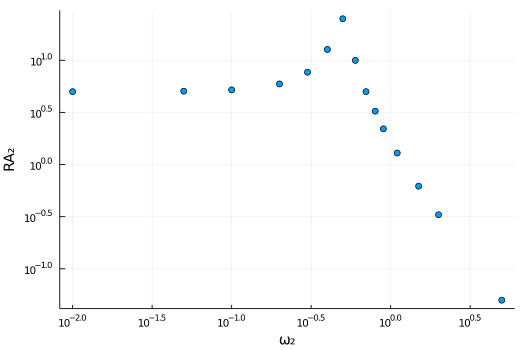

In [23]:
scatter(w_2, RA_2, xscale=:log10, yscale=:log10,
    xlabel="ω₂", ylabel="RA₂", legend=false, dpi=350)

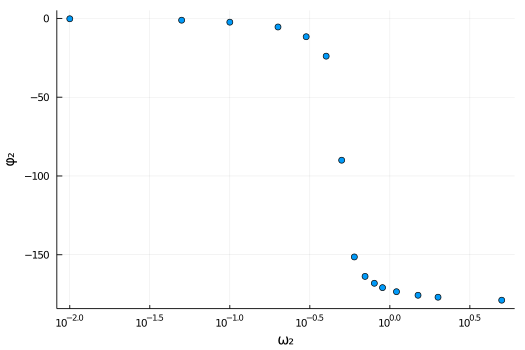

In [24]:
scatter(w_2, phi_2, xscale=:log10,
    xlabel="ω₂", ylabel="φ₂", legend=false, dpi=350)

El sistema 2 claramente es un sistema de segundo orden subamortiguado, solo hay que seguir las siguientes pistas:

1.  El desfase tiende a -180° a medida que el valor de frecuencia angular aumenta.

2.  El gráfico de razón de amplitudes del diagrama de Bode tiene un máximo que indica que se trata de un sistema subamortiguado.

3.  El máximo de razón de amplitudes se produce para un retraso de -90°, lo que es propio de los sistemas de segundo orden.

Este problema nuevamente se puede resolver de cualquiera de las dos maneras para las que se ha resuelto el sistema 1. Si se se realiza un ajuste no lineal para ajustar la razón de amplitudes respecto a la frecuencia angular, se obtiene:

In [25]:
# p[1]: Ganancia del sistema
# p[2]: Constante de tiempo
# p[3]: Coeficiente de amortiguamiento

@. RAmodel2(w, p) = p[1]/sqrt((1-p[2]^2*w^2)^2+(2*p[2]*p[3]*w)^2)

RAfit2 = curve_fit(RAmodel2, w_2, RA_2, [1.0, 1.0, 1.0]; autodiff=:forwarddiff)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([5.004332595589434, -1.9994457248500594, -0.10011895100290764], [0.006293864017719031, 0.0038200613266035077, 0.008199003709473018, 3.391806111441298e-5, 0.0027910040102687717, 0.0004748127835245697, -0.0012328551092473106, 0.016607118969471202, 0.009197149354097434, -0.104898297279989, 0.00744630658066292, 0.005617743325766034, 0.004173416606759073, 0.00334433049841637, 0.0005667789324355493], [1.00039191408461 -0.001962565079160098 0.0008021437527597949; 1.0098889242055542 -0.049980375755219526 0.02063015653783024; … ; 0.0666111462679777 0.35514143024987965 0.009472015501187174; 0.010104599957445384 0.05108144317264549 0.00020665174127284914], true, Float64[])

Los parámetros obtenidos del sistema son:

- Ganancia:

In [42]:
K_2 = RAfit2.param[1]
round(K_2, sigdigits=3)

5.0

- Constante de tiempo:

In [43]:
T_2 = abs(RAfit2.param[2])
round(T_2, sigdigits=3)

2.0

- Coeficiente de amortiguamiento:

In [45]:
Z_2 = abs(RAfit2.param[3])
round(Z_2, sigdigits=3)

0.1

Para comprobar la calidad del ajuste representaremos la función de transferenica del proceso con los parámetros obtenidos más arriba junto con los datos experimentales:

In [29]:
G2 = K_2/(T_2^2*s^2+2*T_2*Z_2*s+1)

               5.00433259558943              
─────────────────────────────────────────────
                  2                          
3.99778320662118⋅s  + 0.400364817118472⋅s + 1

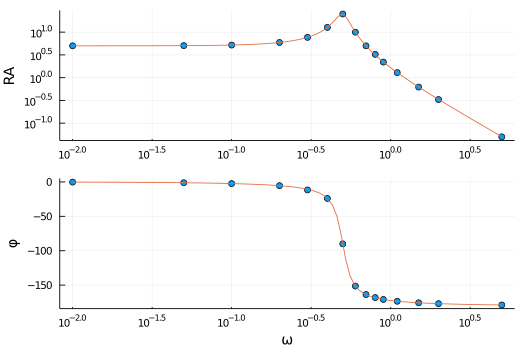

In [30]:
drawbode(G2, w_2, RA_2, phi_2)

_Sistema 3_

En este caso se supondrá que se trata de un sistema de segundo orden sobreamortiguado con retraso:

In [31]:
 w_3 = [0.01, 0.02, 0.10, 0.30, 0.50, 0.70, 1.00, 1.50, 2.00, 2.50, 3.00, 4.00, 8.00, 10.00, 20.00]
RA_3 = [17, 16.99, 16.67, 14.42, 11.66, 9.33, 6.80, 4.30, 2.92, 2.07, 1.55, 0.94, 0.26, 0.17, 0.04]
phi_3 = [-1.49, -2.98, -14.75, -41.21, -61.90, -77.76, -95.73, -117.03, -132.42, -144.53, -154.04, -169.23, -208.22, -223.12, -287.45];

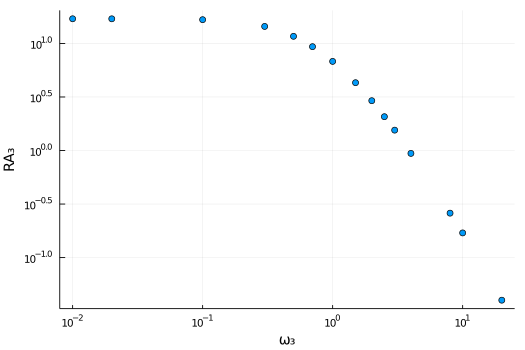

In [33]:
scatter(w_3, RA_3, xscale=:log10, yscale=:log10,
    xlabel="ω₃", ylabel="RA₃", legend=false, dpi=350)

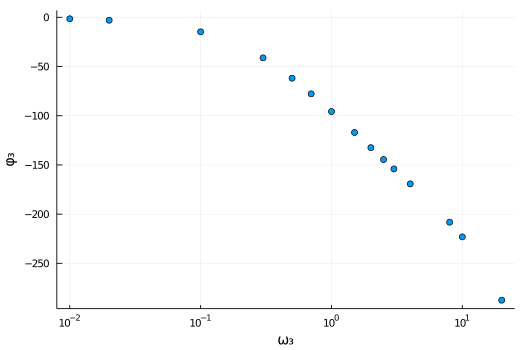

In [35]:
scatter(w_3, phi_3, xscale=:log10,
    xlabel="ω₃", ylabel="φ₃", legend=false, dpi=350)

En primer lugar se obtendrá la ganancia, la constante de tiempo y el coeficiente de amortiguamiento del sistema ajustando la razón de amplitudes:

In [36]:
@. RAmodel3(w, p) = p[1]/sqrt((1-p[2]^2*w^2)^2+(2*p[2]*p[3]*w)^2)

RAfit3 = curve_fit(RAmodel3, w_3, RA_3, [1.0, 1.0, 1.0]; autodiff=:forwarddiff)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([17.00894104880903, -1.0010573200438633, -1.249495468209743], [0.005324369092630121, 0.004487134540500648, -0.012488268917962841, 0.0016676885911977024, 0.004609780915256323, -0.002918241632684726, -0.0008676683175261601, -0.0012069536891559096, -0.006567027601693809, 0.010846511724610597, -0.0013537504702396674, 0.0018252109282144158, -0.003189290657039101, -0.003762198615903295, 0.0022095343682418736], [0.9997873659679328 0.007223585567908273 0.008513590895022023; 0.9991502166873848 0.028843220371402058 0.03398929807924029; … ; 0.009773553856589838 0.3253448423961448 0.007953300199332608; 0.002481608599096026 0.08388754142770173 0.0005207744768818782], true, Float64[])

Se encuentran los siguientes parámetros del proceso:

- Ganancia:

In [40]:
K_3 = RAfit3.param[1]
round(K_3, sigdigits=3)

17.0

- Constante de tiempo: Aunque el valor del ajuste es negativo, este valor no tiene sentido físico ya que debe ser un valor positivo. Se puede tomar el valor positivo sin problema ya que en el modelo la constante de tiempo aparece elevada al cuadrado, por lo que no afecta al ajuste el signo de este parámetro:

In [39]:
T_3 = RAfit3.param[2]
round(T_3, sigdigits=3)

-1.0

- Coeficiente de amortiguamiento: Ocurre con el signo el mismo problema que en el caso anterior:

In [41]:
Z_3 = RAfit3.param[3]
round(Z_3, sigdigits=3)

-1.25

Utilizando los parámetros obtenidos con el ajuste anterior y los datos de desfase se puede encontrar el retraso:

In [46]:
@. phimodel3(w, p) = 180/pi*(atan(-2*Z_3*T_3*w/(1-T_3^2*w^2))-p[1]*w)-180*(w>0.7)

phimodel3 (generic function with 1 method)

In [47]:
phifit3 = curve_fit(phimodel3, w_3, phi_3, [1.0]; autodiff=:forwarddiff)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.09997274324626008], [-0.0004550599482033846, 2.0964885032004332e-5, -0.004315113442558527, -0.027178087348723068, -0.03458157978677434, -0.04330122807311909, -0.04647418863925168, -0.05115281559162099, -0.054517095713464414, 0.12713475044066058, -0.04095240925985877, -0.03432719945126905, -0.01622343255735359, -0.007966020552117925, 0.0220102568649736], [-0.5729577951308232; -1.1459155902616465; … ; -572.9577951308232; -1145.9155902616465], true, Float64[])

In [49]:
td_3 = phifit3.param[1]
round(td_3, sigdigits=3)

0.1

In [50]:
G3 = K_3/(T_3^2*s^2+2*T_3*Z_3*s+1)*exp(-td_3*s)

                   -0.0999727432462601⋅s 
  17.008941048809⋅ℯ                      
─────────────────────────────────────────
                 2                       
1.0021157580134⋅s  + 2.501633169626⋅s + 1

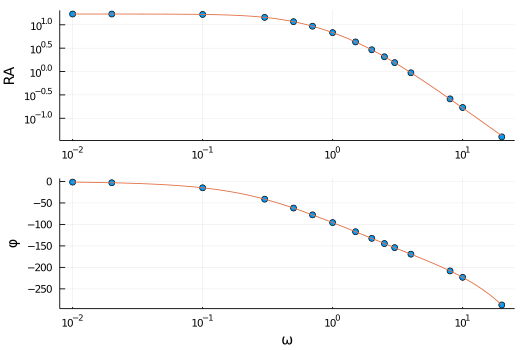

In [51]:
drawbode(G3, w_3, RA_3, phi_3)